## Pathways on PIRM selected genes vs randomly selected genes

In [1]:
import regex as re
import requests
import numpy as np
import random
import pandas as pd 
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from PIRM.PIRMDiscovery import CT_From_Table, Discovery
to_name = pd.read_csv('gene_data/genes.csv').set_index('code')['name'].to_dict()
to_ensembl = pd.read_csv('gene_data/genes.csv').set_index('name')['code'].to_dict()
genes = [v[1] for v in to_name.items() if v[0] in pd.read_csv('gene_data/pe-rna-counts.csv')['Unnamed: 0'].tolist()]
codes = [v[0] for v in to_name.items() if v[0] in pd.read_csv('gene_data/pe-rna-counts.csv')['Unnamed: 0'].tolist()]
counts = np.log1p(pd.read_csv('gene_data/pe-rna-counts.csv', index_col=0)).loc[codes,:]
meta = pd.read_csv("gene_data/pe-rna-metadata.csv", header=None, names=["sample", "classification"])
mild = counts[meta.loc[meta['classification'] == 'Mild', 'sample'].tolist()]
severe = counts[meta.loc[meta['classification'] == 'Severe', 'sample'].tolist()]
control = counts[meta.loc[meta['classification'] == 'Control', 'sample'].tolist()]

We are using the counts for the 37 RNA samples we have. However rather than using the many genes that we have in our database, only the 71 genes that were identified in papers

In [2]:
mild

,PL1015,PL1023,PL1043,PL1362,PL1627,PL1932,PL2195,PL2291,PL2338,PL2353,PL687,PL808,PL810
ENSG00000156508,11.462379,12.842304,12.799694,12.011991,11.998764,12.009177,12.837370,11.361976,12.512010,12.980988,12.593443,13.154979,12.371195
ENSG00000150991,9.422625,10.644615,10.225535,10.041247,9.991544,9.819454,10.964450,8.963160,10.506382,10.740757,10.520321,10.927125,10.202258
ENSG00000087086,10.087391,11.256509,10.873185,10.770985,10.725028,10.748583,11.613865,9.930129,11.519980,11.911426,11.124199,11.500225,11.134749
ENSG00000034510,9.032051,10.267436,10.148236,9.722146,9.632269,9.546670,10.096378,8.692490,9.878529,10.755432,9.926374,10.571625,9.958875
ENSG00000278637,0.000000,5.049856,0.693147,0.000000,5.153292,0.000000,7.146772,3.713572,5.669881,2.944439,0.000000,5.780744,4.276666
ENSG00000113761,5.267858,6.643790,5.707110,5.472271,6.940223,3.713596,7.544332,4.499810,7.030857,5.117994,7.136483,6.559615,5.398163
ENSG00000159388,7.712444,8.818630,8.858369,7.951207,8.048788,8.430327,8.552560,7.386471,8.953769,8.658345,8.396832,9.223454,8.556798
ENSG00000122641,0.000000,6.386878,4.875197,1.791759,0.000000,3.688879,3.218876,0.000000,7.265430,0.000000,5.869297,0.000000,5.252273
ENSG00000265681,8.528548,10.351360,10.240533,9.518374,9.170823,9.358226,10.102549,8.595632,9.750163,10.286808,9.820660,10.399399,9.677034
ENSG00000161970,8.935589,10.842665,10.809513,9.599088,9.779992,9.738776,10.655717,8.949879,10.152743,10.680001,10.205955,10.732023,10.204150


In [3]:
severe

,PL1226,PL1383,PL1493,PL1720,PL1949,PL1962,PL2102,PL2169,PL2209,PL2360,PL2406,PL475,PL519,PL629,PL893
ENSG00000156508,12.709605,12.302857,12.713315,13.054143,13.220321,12.959436,13.230498,12.737877,12.812620,13.140993,13.013849,12.336670,11.855785,11.738759,12.421758
ENSG00000150991,10.465786,10.444124,10.562587,10.608217,10.802713,10.685309,10.880836,10.631664,10.382234,11.025588,11.097486,10.653511,9.857129,9.505916,9.728181
ENSG00000087086,11.307401,11.195416,11.173136,11.772979,11.724166,11.745852,11.742885,11.627664,11.120194,12.259646,11.942009,10.774780,10.487711,10.158040,11.061877
ENSG00000034510,10.203036,9.969322,9.846547,9.938034,10.268860,10.390656,10.247255,10.062157,10.215960,10.934552,10.325056,9.911902,9.154510,9.187174,10.018734
ENSG00000278637,4.553877,4.663439,5.003946,6.695799,5.117994,2.079442,5.587249,3.891820,0.000000,6.765039,6.520621,4.653960,4.477337,4.962845,1.098612
ENSG00000113761,6.781058,6.315360,6.487684,7.830426,8.589886,6.042633,7.067320,6.763885,6.883463,7.275172,5.347108,6.368187,2.397895,3.295837,6.523564
ENSG00000159388,8.339501,8.980172,7.964851,9.224933,9.174920,8.318010,9.226017,8.905987,8.604654,9.140669,8.877940,8.028781,7.867871,7.880426,8.312626
ENSG00000122641,5.433722,6.931472,0.000000,6.126869,5.749393,0.000000,6.875232,5.594711,0.000000,3.135494,7.109880,2.197225,1.098612,4.653960,0.000000
ENSG00000265681,10.032879,9.469645,9.891620,10.070298,10.455954,10.050920,10.398309,9.926632,10.043517,10.558880,10.095698,10.032220,9.051685,8.827607,9.336460
ENSG00000161970,10.432171,10.068444,10.472036,10.224946,10.667956,10.583930,10.565075,9.817872,10.521598,11.064951,10.814099,10.268170,9.477841,9.276174,10.153495


In [4]:
control

,PL1013,PL1159,PL1182,PL1365,PL1506,PL1618,PL1626,PL1648,PL1755
ENSG00000156508,12.409879,12.148532,12.134368,11.687065,11.220334,11.634045,11.943729,11.652855,11.691798
ENSG00000150991,9.726691,10.163349,10.247680,9.954608,8.386173,9.070043,9.096275,10.241530,9.446834
ENSG00000087086,10.961746,10.472403,10.839679,10.263117,9.801344,10.589786,10.684325,10.421388,10.248919
ENSG00000034510,10.348173,9.410993,9.896765,9.228868,8.362409,8.847935,8.594154,8.553332,9.687568
ENSG00000278637,0.000000,6.704414,0.000000,0.000000,0.000000,0.000000,7.071573,7.554335,0.000000
ENSG00000113761,7.475339,4.510860,0.000000,0.000000,0.000000,0.000000,0.000000,5.384495,6.576470
ENSG00000159388,7.537430,8.342125,8.436850,7.849714,6.946014,7.066467,8.147288,7.210080,8.335911
ENSG00000122641,0.000000,6.733402,0.000000,5.641907,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000265681,10.076065,9.374517,9.561766,9.122303,9.573488,9.107752,9.296844,9.419367,9.504225
ENSG00000161970,10.270280,10.017262,9.883334,9.111514,8.006368,9.179262,8.400659,8.951699,9.505172


The `pathways_in_common` takes 2 genes, tests what the top pathways are from pathway commons, and returns them. If both selected genes do not have pathways recognized by pathway commons it returns -1

In [5]:
def pathways_in_common(gene1, gene2):
    pattern = r'"name":"(.*?)","dataSource":'
    gene_1_pathways = re.findall(pattern, requests.get("https://www.pathwaycommons.org/pc2/top_pathways?q="+to_name[gene1]).text)
    gene_2_pathways = re.findall(pattern, requests.get("https://www.pathwaycommons.org/pc2/top_pathways?q="+to_name[gene2]).text)
    if gene_1_pathways == [] and gene_2_pathways == []:
        return -1
    return [value for value in gene_1_pathways if value in gene_2_pathways]

To test how well this works, lets look at the graph of all gene pathways
![pathways](graph.png "Pathways")
The colorful arrows represent genetic enhancers, etc. The black ones represent shared pathways. We see that LEP and CSF1 should share one pathway. Do they?

In [6]:
pathways_in_common(to_ensembl['CSF1'],to_ensembl['IGF1'])

['Integrins in angiogenesis']

It works! We see that GSTM1 and GSTP1 share multiple pathways. Do they?

In [7]:
pathways_in_common(to_ensembl['GSTM1'],to_ensembl['GSTP1'])

['Metabolism of xenobiotics by cytochrome P450',
 'Drug metabolism - cytochrome P450',
 'glutathione-mediated detoxification I']

RPL17 and RPL23 share a ton of pathways. Does the function report this? 

In [8]:
pathways_in_common(to_ensembl['RPL17'],to_ensembl['RPL23'])

['Protein Synthesis: Glutamic Acid',
 'Protein Synthesis: Isoleucine',
 'Protein Synthesis: Serine',
 'Protein Synthesis: Threonine',
 'Protein Synthesis: Valine',
 'Protein Synthesis: Alanine',
 'Protein Synthesis: Tryptophan',
 'Protein Synthesis: Tyrosine',
 'Protein Synthesis: Aspartic Acid',
 'Protein Synthesis: Methionine',
 'Protein Synthesis: Phenylalanine',
 'Protein Synthesis: Leucine',
 'Protein Synthesis: Asparagine',
 'Protein Synthesis: Glutamine',
 'Protein Synthesis: Glycine',
 'Protein Synthesis: Cysteine',
 'Protein Synthesis: Arginine',
 'Protein Synthesis: Lysine',
 'Protein Synthesis: Histidine',
 'Protein Synthesis: Proline']

C1QA and HK2 should have nothing in common

In [9]:
pathways_in_common(to_ensembl['C1QA'],to_ensembl['HK2'])

[]

So the function looks like it works. The following function reports the `top_n` best PIRM pairs

In [10]:
def PIRM_pairs(case, control, top_n):
    ct_case = CT_From_Table(sample_ids = case.columns, group_label = 'case',  table=case.T)
    ct_ctrl = CT_From_Table(sample_ids = control.columns, group_label = 'control',  table=control.T)
    d = Discovery(ct_case, ct_ctrl)
    d.test_all_combos()
    d.filter_results()
    best_pairs = d.best_pairs[:top_n]
    return np.array(best_pairs[['x', 'y', 'mcc']].values)

Now we have a function that makes random pairs

In [11]:
def random_pairs(top_n):
    pairs = []
    for _ in range(top_n):
        pairs.append(random.sample(codes,2))
    return pairs

In [12]:
def pathway_lengths(pair_set):
    p = []
    for combo in pair_set:
        c = combo[:2]
        if len(combo) == 3:
            acc = combo[2]
        pathways = pathways_in_common(*c)
        if pathways == -1:
            pathway_val = -1
        else:
            pathway_val = len(pathways)
        if len(combo) == 3:
            p.append((pathway_val, acc))
        else:
            p.append(pathway_val)
    return p

Now we have the top 50 pairs selected by PIRM for all three cohorts, as well as 50 random pairs

In [13]:
n = 50
mild_control = pathway_lengths(PIRM_pairs(mild, control, n))
severe_control = pathway_lengths(PIRM_pairs(severe, control, n))
severe_mild = pathway_lengths(PIRM_pairs(severe, mild, n))
random = pathway_lengths(random_pairs(n))

In [14]:
print(mild_control)
print(severe_control)
print(severe_mild)
print(random)

[(0, 1.0), (0, 1.0), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (1, 0.9085135251589959), (1, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (20, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0,

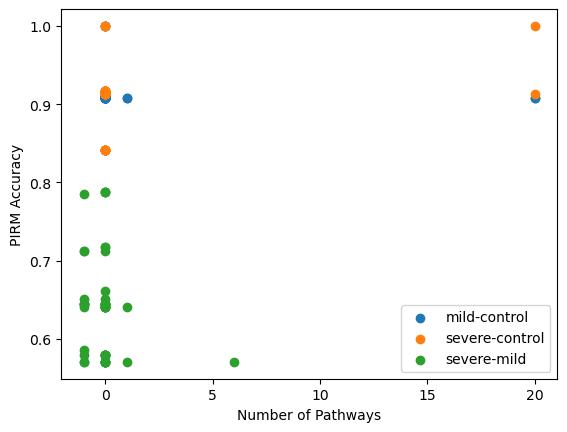

In [15]:
x, y = list(zip(*mild_control))
plt.scatter(x,y, label = 'mild-control')
x, y = list(zip(*severe_control))
plt.scatter(x,y,label = 'severe-control')
x, y = list(zip(*severe_mild))
plt.scatter(x,y,label = 'severe-mild')
plt.legend()
plt.xlabel('Number of Pathways')
plt.ylabel('PIRM Accuracy')
plt.show()

The reason that there is a cap at 20 is because pathwaycommons will not report more than 20 pathways in common via the api. All genes that have 20 pathways in common are ribosomal genes